In [1]:
import qiskit

In [2]:
qiskit.__version__

'1.2.0'

In [3]:
from qiskit import QuantumCircuit

ghz = QuantumCircuit(3,3)

ghz.h(0)

ghz.cx(0,1)

ghz.cx(0,2)

ghz.measure([0,1,2],[0,1,2])

ghz.draw()

┌───┐             ┌─┐   
q_0: ┤ H ├──■────■─────┤M├───
     └───┘┌─┴─┐  │  ┌─┐└╥┘   
q_1: ─────┤ X ├──┼──┤M├─╫────
          └───┘┌─┴─┐└╥┘ ║ ┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     1  0  2


Total count for 000 and 111 are: {'000': 493, '111': 531}


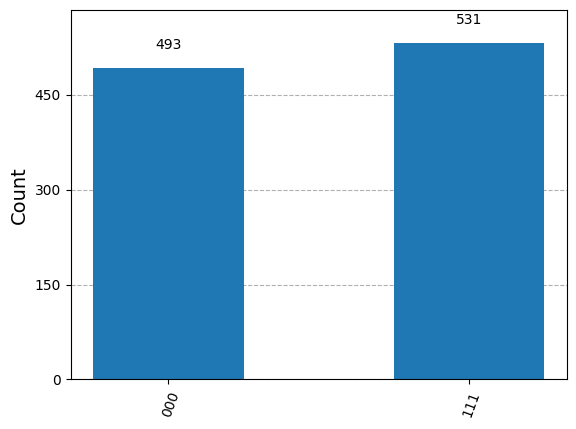

In [4]:
from qiskit import transpile
from qiskit_aer import QasmSimulator
from qiskit.visualization import plot_histogram

simulator = QasmSimulator()
compiled_circuit = transpile(ghz, simulator)

job = simulator.run(compiled_circuit, shots=1024)

result = job.result()

counts = result.get_counts(compiled_circuit)
print("\nTotal count for 000 and 111 are:", counts)

plot_histogram(counts)

## Faki Real Backend

In [5]:
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit.visualization import plot_error_map
backend = FakeManilaV2()

ghz_circuit = transpile(ghz, backend)
ghz_circuit.draw()

global phase: π/4
                                                              
ancilla_0 -> 0 ───────────────────────────────────────────────
                                                              
ancilla_1 -> 1 ───────────────────────────────────────────────
                                           ┌───┐     ┌─┐      
      q_1 -> 2 ────────────────────────────┤ X ├─────┤M├──────
               ┌─────────┐┌────┐┌─────────┐└─┬─┘     └╥┘┌─┐   
      q_0 -> 3 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■────■───╫─┤M├───
               └─────────┘└────┘└─────────┘     ┌─┴─┐ ║ └╥┘┌─┐
      q_2 -> 4 ─────────────────────────────────┤ X ├─╫──╫─┤M├
                                                └───┘ ║  ║ └╥┘
          c: 3/═══════════════════════════════════════╩══╩══╩═
                                                      1  0  2

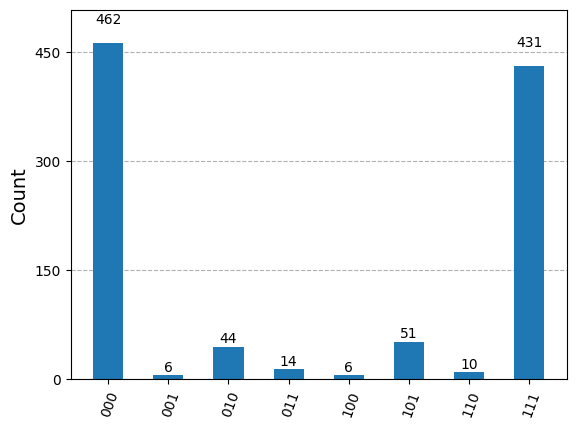

In [6]:
job = backend.run(ghz_circuit)
job.status()

result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [8]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()
job = estimator.run(h)
job.result()

NameError: name 'h' is not defined

In [20]:
from qiskit.quantum_info import Statevector
from qiskit.visualization.array import array_to_latex

qc = QuantumCircuit(1)
Statevector(qc).draw()

'Statevector([1.+0.j, 0.+0.j],\n            dims=(2,))'

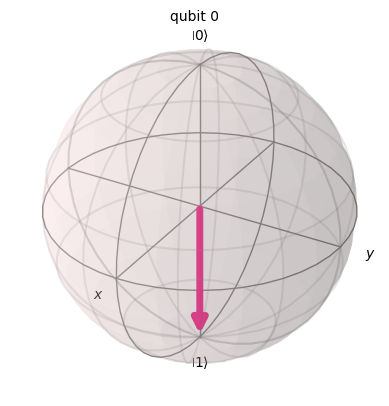

In [21]:
qc.x(0)
Statevector(qc).draw('bloch')

In [22]:
qc.h(0)
Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

In [23]:
qc.s(0)
display(Statevector(qc))
Statevector(qc).draw('latex')

Statevector([0.70710678+0.j        , 0.        -0.70710678j],
            dims=(2,))


<IPython.core.display.Latex object>

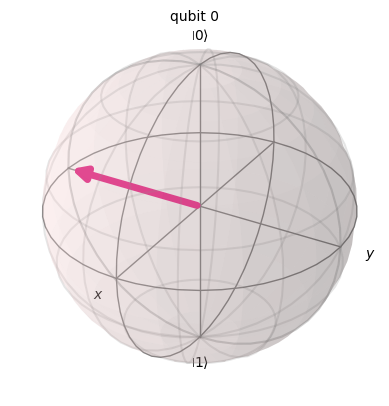

In [24]:
Statevector(qc).draw('bloch')

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


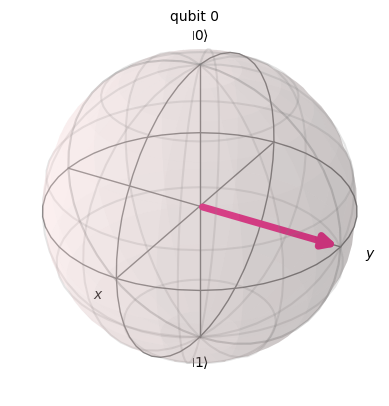

In [25]:
qc.z(0)
display(Statevector(qc))
Statevector(qc).draw('bloch')

Statevector([0.5+0.5j, 0.5-0.5j],
            dims=(2,))


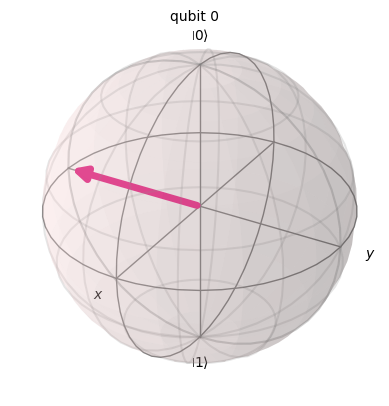

In [26]:
qc.h(0)
display(Statevector(qc))
Statevector(qc).draw('bloch')

In [50]:
from numpy import array

ket10 = array([1, 0])
ket01 = array([0, 1])
ket02 = ket10 + ket01

In [33]:
from numpy import array

ket0 = array([[1], [0]])
ket1 = array([[0], [1]])
ket2 = 1/2 * (ket0 + ket1)
display(ket2.shape)
display(ket2)

(2, 1)

array([[0.5],
       [0.5]])

In [49]:
from numpy import matmul

bra2 = ket2.T * 2
sc0 = matmul(bra2, ket2)
op0 = matmul(ket2, bra2)
display(bra2, sc0, op0)
matmul(op0, ket2)
# display(matmul(ket2, op0))


array([[1., 1.]])

array([[1.]])

array([[0.5, 0.5],
       [0.5, 0.5]])

array([[0.5],
       [0.5]])

In [51]:
display(matmul(op0, ket02), matmul(ket02, op0))

array([1., 1.])

array([1., 1.])

In [42]:
from numpy import sqrt

u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1+2j)/3, -2/3])

display(u.draw('latex'))
v.draw('latex')
v.is_valid()

<IPython.core.display.Latex object>

True

In [57]:
v.measure()

(np.str_('0'),
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

In [58]:
v1 = Statevector([(1+2j)/3, -1/3])
v1.measure()

ValueError: Probabilities do not sum to 1. See Notes section of docstring for more information.

{np.str_('0'): np.int64(543), np.str_('1'): np.int64(481)}

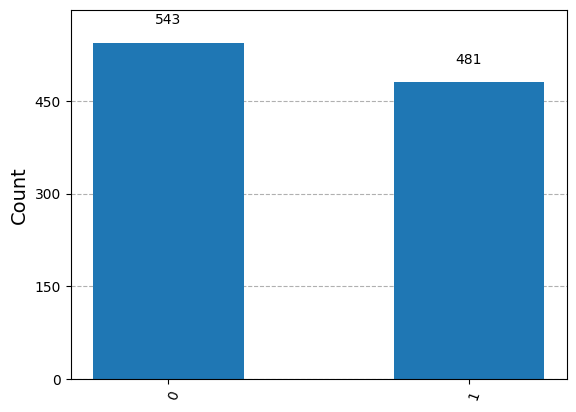

In [59]:
statistics = v.sample_counts(1024)
display(statistics)
plot_histogram(statistics)

In [60]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw()

'Statevector([ 0.85355339+0.35355339j, -0.35355339+0.14644661j],\n            dims=(2,))'

In [61]:
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [64]:
v = Statevector([1, 0])
w = v.evolve(circuit)
w.draw()

'Statevector([ 0.85355339+0.35355339j, -0.35355339+0.14644661j],\n            dims=(2,))'

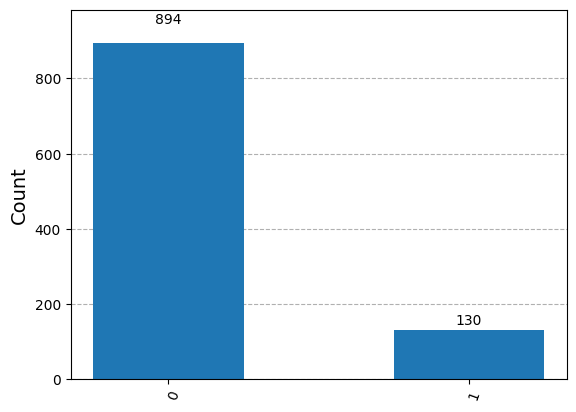

In [66]:
statistics = w.sample_counts(1024)
plot_histogram(statistics)